# Linear Algebra Sprint Challenge

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

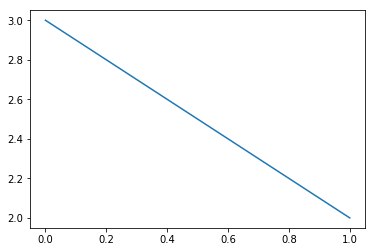

In [3]:
a = np.array([3,2])

plt.plot(a)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [4]:
b = np.array([17,-4,-2,1])

np.linalg.norm(b)

17.60681686165901

```
It represents the length.
```

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [6]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

np.dot(c,d)

42

``` 
They are not orthogonal because their dot product isn't zero.
```

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [8]:
e = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

np.linalg.matrix_power(e,-1)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [9]:
e.T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [10]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [11]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [13]:
np.var(df)

customers    84653.061224
snow             7.346939
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, they are on different scales. To compare one must standardize.


## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [19]:
np.cov(df.T)

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

In [16]:
np.corrcoef(df.T)

array([[1.        , 0.72846346],
       [0.72846346, 1.        ]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [36]:
# Let me get you some data to start you off.

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [37]:
df.dtypes

Country               object
Cheese                 int64
Carcass_Meat           int64
Other_Meat             int64
Fish                   int64
Fats_and_Oils          int64
Sugars                 int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Fresh_Fruit            int64
Cereals                int64
Beverages              int64
Soft_Drinks            int64
Alcoholic Drinks       int64
Confectionery          int64
dtype: object

In [38]:
df = pd.get_dummies(df, columns=['Country'])

df

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,...,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery,Country_England,Country_North Ireland,Country_Scotland,Country_Wales
0,105,245,685,147,193,156,720,253,488,198,...,1102,1472,57,1374,375,54,1,0,0,0
1,103,227,803,160,235,175,874,265,570,203,...,1137,1582,73,1256,475,64,0,0,0,1
2,103,242,750,122,184,147,566,171,418,220,...,957,1462,53,1572,458,62,0,0,1,0
3,66,267,586,93,209,139,1033,143,355,187,...,674,1494,47,1506,135,41,0,1,0,0


In [45]:
scaler = StandardScaler().fit(df)

scaled = scaler.transform(df)

scaled

C:\Users\mindr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mindr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319,  1.73205081, -0.57735027, -0.57735027,
        -0.57735027],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236, -0.57735027, -0.57735027, -0.57735027,
         1.73205081],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725, -0.57735027, -0.57735027,  1.73205081,
        -0.57735027],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [48]:
pca_data = PCA(n_components=2).fit_transform(scaled)
results = pd.DataFrame(pca_data, columns=['PCA1','PCA2'])

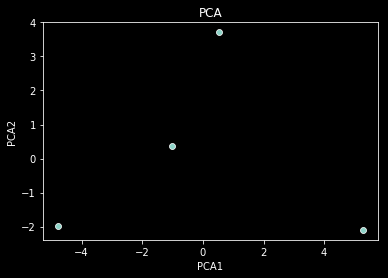

In [78]:
sns.scatterplot(x='PCA1',y='PCA2',data=results)
plt.title('PCA')
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [50]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [59]:
points.count()

x    200
y    200
dtype: int64

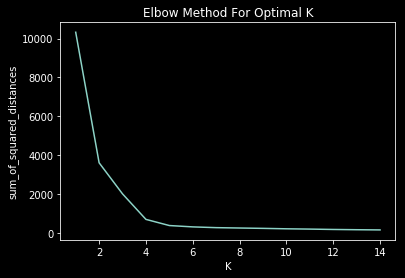

In [77]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances)
plt.xlabel('K')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()

In [60]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(points)

predicted_clusters = kmeans.predict(points)

predicted_clusters

array([0, 2, 2, 0, 2, 2, 0, 0, 3, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1,
       1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3,
       3, 2, 2, 2, 0, 2, 1, 0, 0, 3, 1, 2, 2, 3, 3, 0, 1, 2, 0, 3, 1, 3,
       1, 3, 0, 3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3, 2, 3, 2,
       2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1,
       2, 1, 2, 0, 2, 2, 3, 3, 1, 3, 1, 2, 2, 0, 2, 0, 2, 1, 3, 0, 2, 0,
       2, 0, 3, 3, 2, 1, 0, 2, 3, 2, 2, 1, 2, 3, 2, 3, 0, 2, 2, 2, 0, 1,
       2, 3, 2, 1, 2, 0, 2, 2, 3, 0, 1, 1, 2, 3, 2, 2, 0, 2, 3, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 3, 2, 2, 0, 1, 0, 2, 3, 1, 1,
       2, 2])

In [68]:
points['x']

0     -7.846803
1     -3.554323
2     -0.192822
3     -6.401456
4     -0.804026
5     -4.977194
6     -8.118990
7     -8.145629
8     -3.568659
9     -5.711709
10    -4.006063
11    -4.347019
12     0.022885
13    -4.653388
14    -8.263067
15    -1.789254
16    -7.566834
17    -3.002127
18    -2.576739
19     6.740574
20    -7.966105
21     6.265568
22     6.285179
23     6.405280
24    -2.685595
25    -5.283027
26     0.070973
27    -1.640516
28    -4.606712
29    -4.683859
         ...   
170   -9.848325
171   -0.456371
172   -3.581746
173    7.807885
174   -0.580261
175   -2.216288
176   -3.430369
177   -3.718590
178   -5.702522
179   -7.262219
180   -4.181205
181   -0.799163
182   -3.385628
183   -2.760584
184   -1.771113
185   -2.796932
186   -9.770175
187    7.430405
188   -3.922665
189    0.049603
190   -3.488445
191   -9.152373
192    6.330956
193   -7.483404
194   -4.581117
195   -3.560689
196    5.051216
197    6.127624
198   -1.783078
199   -0.339587
Name: x, Length: 200, dt

Text(0.5, 1.0, 'Clusters')

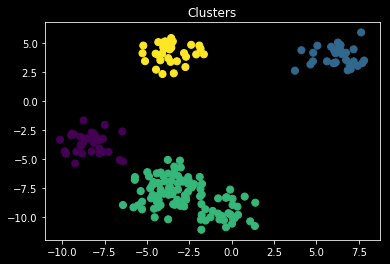

In [73]:
plt.style.use('dark_background')
plt.scatter(points['x'], points['y'], c=predicted_clusters, s=50, cmap='viridis')
plt.title('Clusters')